In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

In [2]:
Google = pd.read_csv('googleplaystore.csv')


Google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
Apple = pd.read_csv('AppleStore.csv')

Apple.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [4]:
Google = Google[['Category', 'Rating', 'Reviews', 'Price']]

Google.head()

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0
3,ART_AND_DESIGN,4.5,215644,0
4,ART_AND_DESIGN,4.3,967,0


In [5]:
Apple = Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]

Apple.head()

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00
3,Shopping,4.0,262241,0.00
4,Reference,4.5,985920,0.00


In [6]:
Apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [7]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

In [8]:
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [9]:
Google[Google["Price"] == "Everyone"]

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


In [10]:
Google_1 = Google[Google['Price'] != 'Everyone']

Google_1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [11]:
 nosymb = Google_1['Price'].str.replace('$','')
Google_1["Price"] = pd.to_numeric(nosymb)

C:\Users\admin\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
Google_1.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

In [13]:
Google_1['Reviews']=pd.to_numeric(Google_1['Reviews'])

C:\Users\admin\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
Google_1.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

In [15]:
Google_1['platform'] = 'google'
Apple['platform'] = 'apple'

C:\Users\admin\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
Google_1.head(3)

,Category,Rating,Reviews,Price,platform
0,ART_AND_DESIGN,4.1,159,0.0,google
1,ART_AND_DESIGN,3.9,967,0.0,google
2,ART_AND_DESIGN,4.7,87510,0.0,google


In [17]:
old_names = Apple.columns

new_names = Google_1.columns

Apple=Apple.rename(columns=dict(zip(old_names,new_names)))

In [18]:
df=Apple.append(Google_1,ignore_index=True)    

df.sample(12)

,Category,Rating,Reviews,Price,platform
6611,Photo & Video,5.0,12,1.99,apple
2214,Entertainment,4.5,5424,0.00,apple
15934,FOOD_AND_DRINK,3.1,194,0.00,google
23,Business,4.5,8,5.99,apple
11109,GAME,4.5,8389714,0.00,google
6859,Games,4.0,15,0.00,apple
31,Health & Fitness,4.5,13350,1.99,apple
6784,Music,4.5,110,29.99,apple
11378,TOOLS,3.3,6,5.99,google
10248,SPORTS,4.8,1660,0.00,google


In [19]:
df.shape
df = df.dropna()

df.shape

(16563, 5)

In [20]:

df[df['Reviews'] == 0].count()

Category    929
Rating      929
Reviews     929
Price       929
platform    929
dtype: int64

929 apps do not have reviews, we need to eliminate these points.

In [21]:
df=df[df['Reviews']>=1]

In [22]:
df.shape

(15634, 5)

In [23]:
df.groupby('platform').mean()

,Rating,Reviews,Price
platform,,,
apple,4.049697,14803.805520,1.821977
google,4.191757,514049.836536,0.960928


Our means of 4.049697 and 4.191757 don't seem all that different. We have an observed difference here: which is simply (4.191757 - 4.049697) = 0.14206. This is just the actual difference that we observed between the mean rating for apps from Google Play, and the mean rating for apps from the Apple Store.

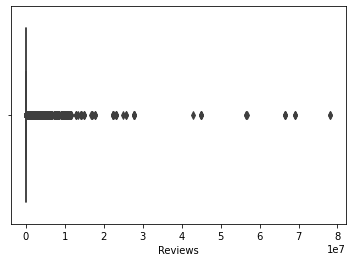

In [24]:
import seaborn as sns
sns.boxplot(df['Reviews'])


Our **Null hypothesis** is just:

**H<sub>null</sub>**: the observed difference in the mean rating of Apple Store and Google Play apps is due to chance (and thus not due to the platform).

**H<sub>alternative</sub>**: the observed difference in the average ratings of apple and google users is not due to chance (and is actually due to platform)

We're also going to pick a significance level of 0.05. 

In [25]:
apple = df[df['platform']=='apple']['Rating']
google = df[df['platform']=='google']['Rating']


In [26]:
apple_normal = stats.normaltest(apple)
apple_normal

NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)

In [27]:
google_normal = stats.normaltest(google)
google_normal

NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)

Since the p-values is 0 for both tests, regardless of what we pick for the significance level, our conclusion is that the data are not normally distributed. 
 

(array([  44.,   56.,  106.,  196.,    0.,  383.,  702., 1626., 2663.,
         492.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

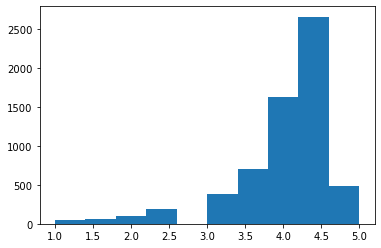

In [28]:
plt.hist(apple)

(array([  17.,   18.,   41.,   74.,  137.,  446.,  879., 1662., 4175.,
        1917.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

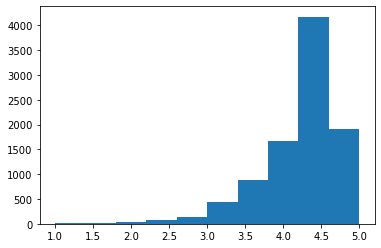

In [29]:
plt.hist(google)

In [31]:
df['Permutation']=np.random.permutation(df['Rating'])
df.groupby('platform')['Permutation'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.133073,0.607158,1.0,4.0,4.3,4.5,5.0
google,9366.0,4.135960,0.616830,1.0,4.0,4.3,4.5,5.0


In [32]:
df.groupby('platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


In [33]:
difference=list()  

for i in range(10000):
    p=np.random.permutation(df['Rating']) 
    difference.append(np.mean(p[df['platform']=='apple']) - np.mean(p[df['platform']=='google']))

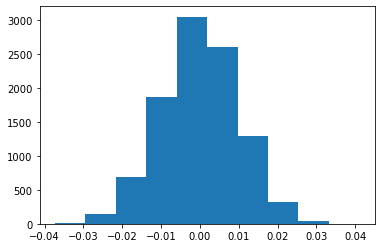

In [34]:
histo = plt.hist(difference)

In [36]:
obs_difference = np.mean(apple) - np.mean(google)

abs(obs_difference)

0.1420605474512291

In [38]:
p_value = np.sum(difference <= obs_difference)/len(difference)
p_value

0.0

So actually, zero differences are at least as extreme as our observed difference.

So the p-value of our observed data is 0. 

It doesn't matter which significance level we pick our observed data is statistically significant, and we reject the Null.

We conclude that platform does impact on ratings. Specifically,the app should be only on Google Play.